In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines (1).csv to gas_turbines (1).csv


In [4]:
df = pd.read_csv('gas_turbines (1).csv')

In [5]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


## EXPLORATORY DATA ANALYSIS

In [6]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [8]:
df.shape

(15039, 11)

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [11]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [60]:
X = df.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= df.loc[:,['TEY']]

## VISUALIZATION

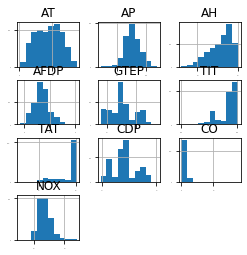

In [61]:
# plot the histograms of all features or variable in the data
X.hist(sharex=False, sharey=False,  xlabelsize=1, ylabelsize=1, figsize=(4,4))
plt.show()

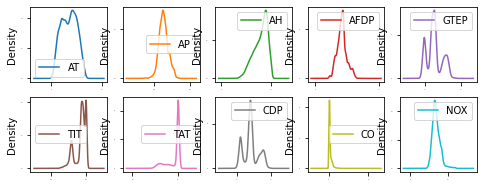

In [62]:
X.plot(kind='density', subplots=True, layout=(5,5), sharex=False, legend=True, fontsize=1, figsize=(8,8))
plt.show()

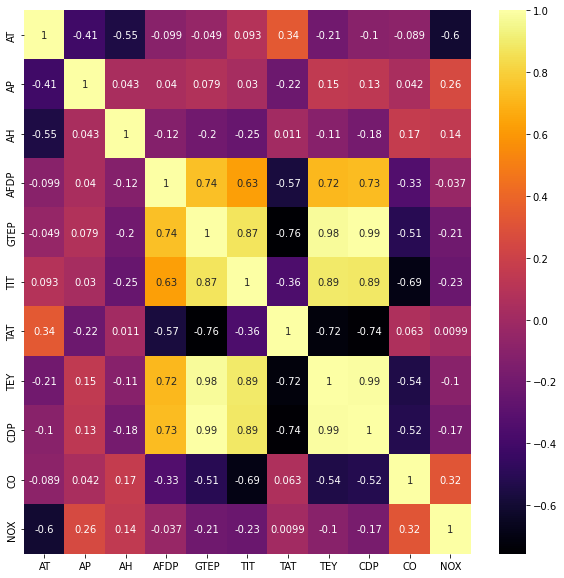

In [64]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="inferno")

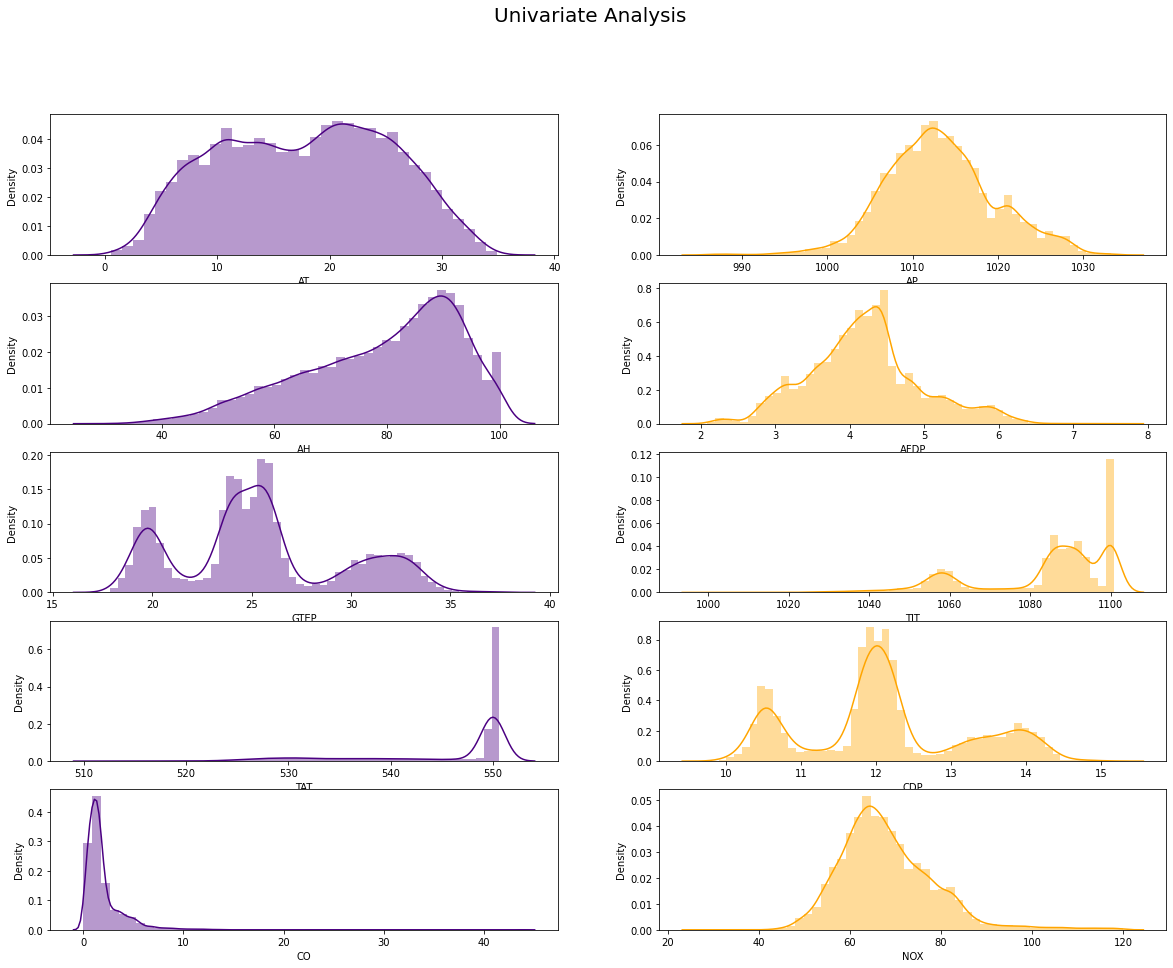

In [70]:
fig, axes = plt.subplots(5, 2, figsize=(20, 15))
fig.suptitle('Univariate Analysis',fontsize=20)
sns.distplot(df['AT'],ax=axes[0,0],color='indigo')
sns.distplot(df['AP'],ax=axes[0,1],color='orange')
sns.distplot(df['AH'],ax=axes[1,0],color='indigo')
sns.distplot(df['AFDP'],ax=axes[1,1],color='orange')
sns.distplot(df['GTEP'],ax=axes[2,0],color='indigo')
sns.distplot(df['TIT'],ax=axes[2,1],color='orange')
sns.distplot(df['TAT'],ax=axes[3,0],color='indigo')
sns.distplot(df['CDP'],ax=axes[3,1],color='orange')
sns.distplot(df['CO'],ax=axes[4,0],color='indigo')
sns.distplot(df['NOX'],ax=axes[4,1],color='orange')


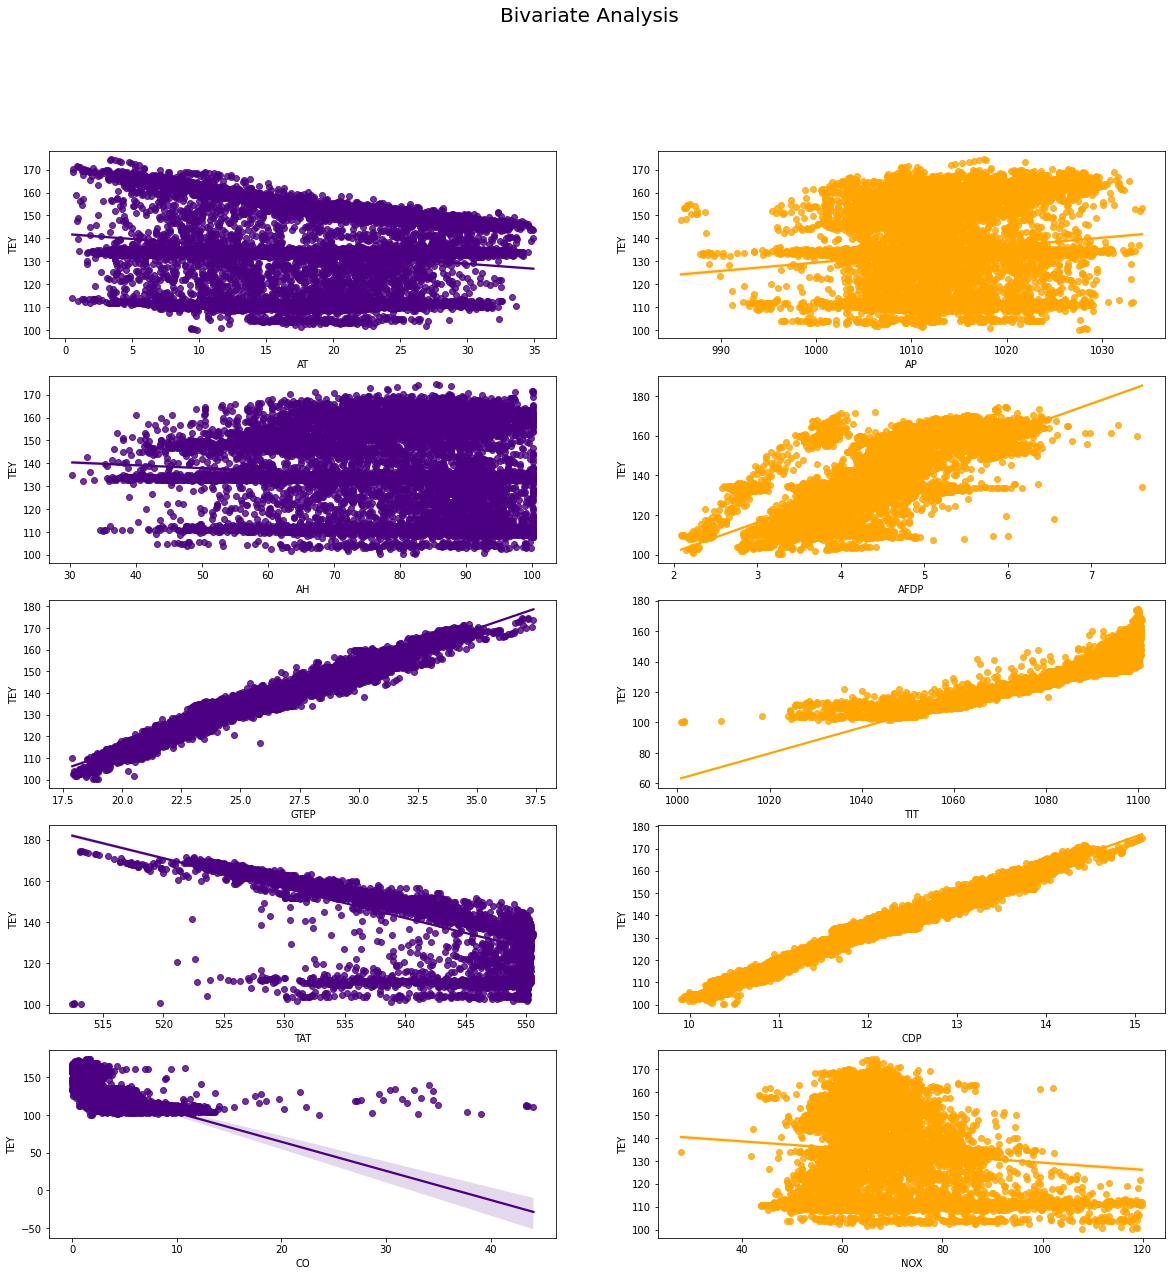

In [71]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
fig.suptitle('Bivariate Analysis',fontsize=20)
sns.regplot(x="AT",y="TEY",data=df,ax=axes[0,0],color='indigo')
sns.regplot(x="AP",y="TEY",data=df,ax=axes[0,1],color='orange')
sns.regplot(x="AH",y="TEY",data=df,ax=axes[1,0],color='indigo')
sns.regplot(x="AFDP",y="TEY",data=df,ax=axes[1,1],color='orange')
sns.regplot(x="GTEP",y="TEY",data=df,ax=axes[2,0],color='indigo')
sns.regplot(x="TIT",y="TEY",data=df,ax=axes[2,1],color='orange')
sns.regplot(x="TAT",y="TEY",data=df,ax=axes[3,0],color='indigo')
sns.regplot(x="CDP",y="TEY",data=df,ax=axes[3,1],color='orange')
sns.regplot(x="CO",y="TEY",data=df,ax=axes[4,0],color='indigo')
sns.regplot(x="NOX",y="TEY",data=df,ax=axes[4,1],color='orange')

In [13]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [50]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04
mean,4.913654e-16,-1.875504e-14,2.570219e-16,1.511894e-16,-7.559468e-17,-3.260021e-15,1.640405e-15,1.965462e-16,3.779734e-17,4.233302e-16
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00,-2.779497e+00,-1.806771e+00,-5.021933e+00,-4.188141e+00,-1.992416e+00,-8.874862e-01,-3.861033e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01,-6.266930e-01,-5.091458e-01,-2.540512e-01,-4.101146e-01,-4.354335e-01,-5.015202e-01,-6.578107e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01,-1.854065e-02,-8.075681e-02,2.965544e-01,5.712570e-01,-7.011925e-02,-2.620452e-01,-1.518527e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01,4.612196e-01,4.228638e-01,7.382490e-01,5.928675e-01,4.311680e-01,8.455882e-02,5.486567e-01
max,2.266234e+00,3.275970e+00,1.528011e+00,4.486233e+00,2.871006e+00,1.028678e+00,6.627839e-01,2.700105e+00,1.895949e+01,4.937717e+00


In [20]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 14.4 MB/s 
     |████████████████████████████████| 1.6 MB 41.5 MB/s 


#### ****Tuning of Hyperparameters :- ****

In [27]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner import RandomSearch

In [40]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [39]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name=' Gas turbine')

In [41]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [43]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 28s]
val_mean_absolute_error: 4.405237277348836

Best val_mean_absolute_error So Far: 1.3718243837356567
Total elapsed time: 00h 02m 47s


In [33]:
tuner.results_summary()

Results summary
Results in project/Air Quality Index
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 4
units_0: 96
units_1: 224
learning_rate: 0.0001
units_2: 96
units_3: 128
units_4: 224
units_5: 416
units_6: 288
units_7: 192
units_8: 448
units_9: 224
units_10: 448
units_11: 448
units_12: 448
units_13: 64
units_14: 128
Score: 1.164077361424764
Trial summary
Hyperparameters:
num_layers: 7
units_0: 448
units_1: 384
learning_rate: 0.0001
units_2: 288
units_3: 96
units_4: 448
units_5: 352
units_6: 416
units_7: 480
units_8: 448
units_9: 160
units_10: 288
units_11: 480
units_12: 96
units_13: 32
units_14: 128
Score: 1.202642281850179
Trial summary
Hyperparameters:
num_layers: 4
units_0: 128
units_1: 224
learning_rate: 0.0001
units_2: 128
units_3: 64
units_4: 288
units_5: 416
units_6: 352
units_7: 288
units_8: 128
units_9: 224
units_10: 32
units_11: 256
units_12: 352
units_13: 128
units_14: 256
Score: 1.5343132019042969
Trial summary
Hyperparameters:
num_layers: 12
units_0: 

## MODEL BUILDING

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10527, 10)
(4512, 10)
(10527, 1)
(4512, 1)


In [66]:
model=Sequential()
model.add(Dense(units=10,input_dim=10,activation ='relu',kernel_initializer='normal'))
model.add(Dense(units=6,activation='tanh',kernel_initializer='normal'))
model.add(Dense(units=1,activation='relu',kernel_initializer='normal'))

In [67]:
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mse'])

In [48]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
import tensorflow as tf
#Model Validation
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error

In [68]:
model.fit(X_train,y_train, epochs=100, batch_size=20)

Epoch 1/100
527/527 [==============================] - 2s 3ms/step - loss: 132.2784 - mse: 17747.7969
Epoch 2/100
527/527 [==============================] - 1s 3ms/step - loss: 128.5887 - mse: 16785.0586
Epoch 3/100
527/527 [==============================] - 1s 3ms/step - loss: 124.8994 - mse: 15850.3066
Epoch 4/100
527/527 [==============================] - 1s 3ms/step - loss: 121.2102 - mse: 14942.5117
Epoch 5/100
527/527 [==============================] - 1s 3ms/step - loss: 117.5211 - mse: 14061.7686
Epoch 6/100
527/527 [==============================] - 1s 3ms/step - loss: 113.8324 - mse: 13208.3340
Epoch 7/100
527/527 [==============================] - 1s 3ms/step - loss: 110.1436 - mse: 12381.7910
Epoch 8/100
527/527 [==============================] - 1s 3ms/step - loss: 106.4549 - mse: 11583.0098
Epoch 9/100
527/527 [==============================] - 1s 3ms/step - loss: 102.7662 - mse: 10811.3008
Epoch 10/100
527/527 [==============================] - 1s 3ms/step - loss: 99.077

In [69]:
scores = model.evaluate(X_test,y_test)
print((model.metrics_names[1]))

141/141 [==============================] - 0s 2ms/step - loss: 11.2025 - mse: 253.5898
mse
